# Implementing Ke et al. 2018 within python
Notes:
I was able to fully implement Ke et al.'s dynamics. Will try to replicate the heatmap and see how that works out - but the heatmap may actually take a long time. Could be good to search through the parameter space - but good job in implementing the paper's model.

A few things that we would need to do before implementing two different cell populations are:
1. Add the change in virion. That is dependent on the number of activated cells in the system and the decay of the virion. 
    - Don't know what the parameters are but there are some dummy parameters available that I put in. It looks like the graph that Alison had drawn briefly
2. Add a drug decay term. That acts on the alpha term.
    - An issue encountered here is that the assumption is that the drug efficacy parameter is linearly related to the drug combination. I think what a better assumption is steeper, maybe some sort of exponential. 
    - Unsure how to actually make that equation steeper.
3. Convert everything to concentrations that are measurable in the blood. 
4. Add a second population of cells

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

## Define Model

In [71]:
#Define the model
def model(z,t):
    #Set initial conditions for the drugs
    I = z[4]
    B = z[5]
    a = z[6]
    
    #Set initial conditions for the cells
    L = z[0]
    A = z[1]
    R = z[2]
    V = z[3]
    
    
    #for drug dosing
    dIdt = -e*I
    dBdt = e*I-k*B
    dadt = dBdt*(1/5)
    
    #for cells
    dLdt = (p-d)*L - n*L - a*L + w*R
    dAdt = (p-delta)*A + a*L - gamma*A
    dRdt = (p-d)*R + gamma*A - w*R
    dVdt = ld*A - dv*V
    
    
    dzdt = [dLdt, dAdt, dRdt, dVdt, dIdt, dBdt, dadt]
    return dzdt

## Set Initial Conditions and Solve for Those Conditions

In [78]:
#initial conditions, there are three
z0 = [10**6, 0, 0,0,10,0,0]

#number of time points
tn = 501

#time points
t = np.linspace(0,50, tn)


#store solutions
L = np.empty_like(t)
A = np.empty_like(t)
R = np.empty_like(t)
V = np.empty_like(t)
T = np.empty_like(t)
I = np.empty_like(t)
B = np.empty_like(t)
a = np.empty_like(t)

#record intial
L[0] = z0[0]
A[0] = z0[1]
R[0] = z0[2]
V[0] = z0[3]
T[0] = L[0]+A[0]+R[0]
I[0] = z0[4]
B[0] = z0[5]
a[0] = z0[6]

#give constants
d = 0.006
n = 0.0017
p = 0.0072
delta = 0.5
gamma = 0.5
w = 1
ld = 10
dv = 0.5

#constants for the drugs
k = 0.4
e = 0.5

#Solve the ODE
for i in range(1,tn):
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan)
    # store solution for plotting
    L[i] = z[1][0]
    A[i] = z[1][1]
    R[i] = z[1][2]
    V[i] = z[1][3]
    
    I[i] = z[1][4]
    B[i] = z[1][5]
    a[i] = z[1][6]
    
    T[i] = L[i]+A[i]+R[i]
    # next initial condition
    z0 = z[1] 



## Plot the Data for the Continous Drugging Case

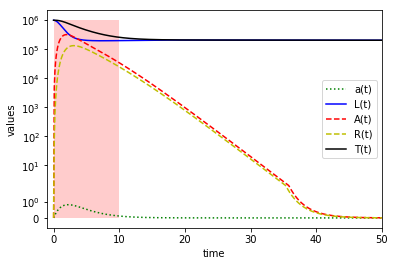

In [79]:
# plot results
fig, ax = plt.subplots()
plt.plot(t,a,'g:',label='a(t)')
plt.plot(t,L,'b-',label='L(t)')
plt.plot(t,A,'r--',label='A(t)')
plt.plot(t,R,'y--',label='R(t)')
plt.plot(t,T,'k-', label='T(t)')
#plt.plot(t,V,'g--',label = 'V(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
#plt.yscale('symlog')
x = [0,10,10,0]
y = [0,0,10**6,10**6]
ax.fill(x,y,alpha = 0.2, facecolor = 'red')
plt.xlim([-1,50])
#plt.ylim([0,10**6])
plt.yscale('symlog')
plt.show()


## Do the same modeling but alpha becomes pulse like inputs

In [74]:
#initial conditions, there are three
z0 = [10**6, 0, 0,0,5,0,0]

#number of time points
tn = 501

#time points
t = np.linspace(0,50, tn)


#store solutions
L = np.empty_like(t)
A = np.empty_like(t)
R = np.empty_like(t)
V = np.empty_like(t)
T = np.empty_like(t)
I = np.empty_like(t)
B = np.empty_like(t)
a = np.empty_like(t)

#record intial
L[0] = z0[0]
A[0] = z0[1]
R[0] = z0[2]
V[0] = z0[3]
T[0] = L[0]+A[0]+R[0]
I[0] = z0[4]
B[0] = z0[5]
a[0] = z0[6]

#give constants
d = 0.006
n = 0.0017
p = 0.0072
delta = 0.05
gamma = 10
w = 1
ld = 10
dv = 0.5

#constants for the drugs
k = 0.4
e = 0.5

z1 = [0,0,0,0,5,0,0]
#Solve the ODE
for i in range(1,tn):
    tspan = [t[i-1],t[i]]
    if i%50 == 0:
        z0= z0+z1
    z = odeint(model,z0,tspan)
    # store solution for plotting
    L[i] = z[1][0]
    A[i] = z[1][1]
    R[i] = z[1][2]
    V[i] = z[1][3]
    
    I[i] = z[1][4]
    B[i] = z[1][5]
    a[i] = z[1][6]
    
    T[i] = L[i]+A[i]+R[i]
    # next initial condition
    z0 = z[1] 



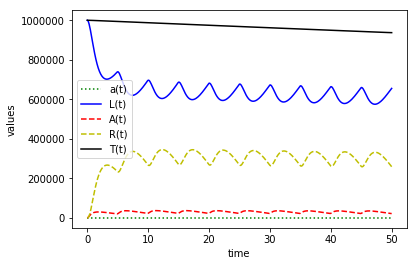

In [76]:
# plot results
fig, ax = plt.subplots()
plt.plot(t,a,'g:',label='a(t)')
plt.plot(t,L,'b-',label='L(t)')
plt.plot(t,A,'r--',label='A(t)')
plt.plot(t,R,'y--',label='R(t)')
plt.plot(t,T,'k-', label='T(t)')
#plt.plot(t,V,'g--',label = 'V(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
#plt.yscale('symlog')
plt.show()
